# THÔNG TIN NHÓM

- ĐỒ ÁN CUỐI KÌ MÔN `LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU`
- Thành viên:
    + 18120517 Nguyễn Công Bình Phương
    + 18120514 Phan Thiên Phúc

# BÀI PHÂN TÍCH

## Import các thư viện cần thiết vào môi trường

In [1]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## GIỚI THIỆU VỀ DATA

nguồn: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

- Content: This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.

- References: 
    United Nations Development Program. (2018). Human development index (HDI). Retrieved from http://hdr.undp.org/en/indicators/137506

    World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016. Retrieved from http://databank.worldbank.org/data/source/world-development-indicators#

    [Szamil]. (2017). Suicide in the Twenty-First Century [dataset]. Retrieved from https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook

    World Health Organization. (2018). Suicide prevention. Retrieved from http://www.who.int/mental_health/suicide-prevention/en/

- Inspiration: Suicide Prevention.


***Data dictionary***:
- Country: Column representing countries (string)
- Year: Column representing years (integer)
- Sex: Column representing genres (string)
- Age: Column representing ages (string)
- Suicides_no: Column representing the number of suicides (integer)
- Population: Column representing the population (integer)
- Suicides / 100k pop: Column that represents the number of suicides per 100 thousand inhabitants (float)
- Country-year: Column that represents (string)
- HDI for year: Column that represents the HDI in each year (float)
- Gdp_for_year($): Column representing GDP in each year (string)
- Gdp_per_capita($): Column representing GDP per capita (float)
- Generation: Column that represents the generation (string)

## KHÁM PHÁ DỮ LIỆU

### Đọc file dữ liệu

In [2]:
df = pd.read_csv('master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


### Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột?

In [3]:
df.shape

(27820, 12)

### Kiểu dữ liệu của từng cột

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


**Nhận xét:** Các cột có kiểu dữ liệu phù hợp với dữ liệu cung cấp. Tuy nhiên, ta thấy có cột `country-year` khá thừa khi đã có cột `country` và `year` độc lập. Ta sẽ loại bỏ cột `country-year` ở trong bước tiền xử lý dữ liệu.

### Dữ liệu có các dòng bị lặp hay rỗng không?

In [5]:
df.duplicated().any()

False

=> Không có dữ liệu lặp

In [6]:
df.isnull().values.any()

True

=> Trong tập dữ liệu có các điểm dữ liệu thiếu => Ta sẽ cùng tìm hiểu kĩ hơn

In [7]:
def count_missing_values(s):
    return s.isna().sum()

def calculate_missing_percentage(s):
    return s.isna().sum() / df.shape[0] * 100

df.agg([count_missing_values, calculate_missing_percentage])

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
count_missing_values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19456.000000,0.0,0.0,0.0
calculate_missing_percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.935298,0.0,0.0,0.0


**Nhận xét:** Ta thấy rằng trong tập dữ liệu chỉ có duy nhất cột `HDI for year` có giá trị thiếu và  bị thiếu dữ liệu rất nhiều (~ 70%).
`HDI for year` ở đây là chỉ số `Human Development Index` của đất nước tại thời điểm được xét `year`. Tìm thiểu thêm về HDI [tại đây](https://vi.wikipedia.org/wiki/Ch%E1%BB%89_s%E1%BB%91_ph%C3%A1t_tri%E1%BB%83n_con_ng%C6%B0%E1%BB%9Di)

Vậy nên ta sẽ loại bỏ cột này ở bước tiền xử lý dữ liệu

## INSIGHT

Trước khi bước đến bước tiền xử lý dữ liệu, dựa vào những khám phá và phân tích dữ liệu cơ bản ở các bước trên. Ta sẽ chọn insight sau

***Sự ảnh hưởng của việc tự tử ở người dân đối với nền kinh tế các nước***


Dự đoán của bản thân trước khi phân tích:
```
Có thể việc tự tử ở người dân sẽ chịu ảnh hưởng và gây ảnh hưởng đến nền kinh tế của một nước. Dự đoán xu hướng của việc tự tử và sự phát triển của nền kinh tế sẽ có sự đối nghịch nhau và có mối quan hệ nhân-quả
```

## Tiền xử lý dữ liệu

Dựa theo insight nên ta sẽ tạm thời lọc ra những cột dữ liệu không cần thiết/không liên quan đến insight của ta.
Đó là các cột `sex, age, country-year, generation`. Riêng cột `HDI for year` liên quan đến insight mà ta đã chọn nhưng vì theo phân tích ở trên, ta sẽ loại bỏ vì dữ liệu thiếu quá nhiều.

### Lọc dữ liệu

In [8]:
insight_df = df.drop(['sex', 'age', 'country-year', 'generation', 'HDI for year'], axis=1)
insight_df = insight_df.rename(columns={' gdp_for_year ($) ': 'gdp_for_year ($)'})
insight_df

,country,year,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
0,Albania,1987,21,312900,6.71,"2,156,624,900",796
1,Albania,1987,16,308000,5.19,"2,156,624,900",796
2,Albania,1987,14,289700,4.83,"2,156,624,900",796
3,Albania,1987,1,21800,4.59,"2,156,624,900",796
4,Albania,1987,9,274300,3.28,"2,156,624,900",796
...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,107,3620833,2.96,"63,067,077,179",2309
27816,Uzbekistan,2014,9,348465,2.58,"63,067,077,179",2309
27817,Uzbekistan,2014,60,2762158,2.17,"63,067,077,179",2309
27818,Uzbekistan,2014,44,2631600,1.67,"63,067,077,179",2309


## Khám phá dữ liệu (tiếp tục) và trả lời insight

### Xem mức độ phân bố của các thuộc tính quan trọng

In [9]:
# Group attributes by country
mean_df = insight_df.drop(['year'], axis=1).groupby(['country']).mean()
mean_df

,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
country,,,,
Albania,7.462121,2.360813e+05,3.502879,1859.045455
Antigua and Barbuda,0.033951,6.142679e+03,0.552901,10448.185185
Argentina,221.018817,2.784907e+06,10.469328,7914.096774
Armenia,6.392617,2.595576e+05,3.275872,1873.919463
Aruba,0.601190,7.498077e+03,9.503095,24221.642857
...,...,...,...,...
United Arab Emirates,8.638889,5.069760e+05,1.317917,42162.000000
United Kingdom,367.755376,4.674107e+06,7.502473,31908.354839
United States,2779.604839,2.165061e+07,13.819812,39269.612903


**Nhận xét**: Ta thấy rằng vì tập dữ liệu được thu thập ở quy mô lớn (khắp thế giới) nên có sự chênh lệnh số liệu khá lớn giữa các nước khác nhau (Điển hình là `United States` và `Antigua and Barbuda`)

***=>*** Vậy nên ta sẽ khám phá và tìm câu trả lời cho insight ở các nước có số liệu đặc trưng và nổi bật. Ta sẽ xét trên `Top 10 nước có số ca tự tử trung bình lớn nhất` và `Top 10 nước có GDP trung bình lớn nhất`

Ngoài ra, ta để đảm bảo tính khách quan cho việc đánh giá xu hướng tự tử của một nước, ta sẽ thêm cột `suicides rates` (Tỉ lệ tự tử = Số ca tự tử / Tổng số dân) để tránh bị ảnh hưởng giữa việc chênh lệch về dân số (`population`).
Tương tự, ta cũng sẽ đánh giá xu hướng phát triển của một nước dựa trên cột `gdp_per_capita ($)` để tránh bị ảnh hưởng giữa việc chênh lệch lớn về `GDP`.

In [10]:
# Add suicides rates to insight df

insight_df['suicides_rates'] = insight_df['suicides_no'] / insight_df['population'] * 100
insight_df

,country,year,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),suicides_rates
0,Albania,1987,21,312900,6.71,"2,156,624,900",796,0.006711
1,Albania,1987,16,308000,5.19,"2,156,624,900",796,0.005195
2,Albania,1987,14,289700,4.83,"2,156,624,900",796,0.004833
3,Albania,1987,1,21800,4.59,"2,156,624,900",796,0.004587
4,Albania,1987,9,274300,3.28,"2,156,624,900",796,0.003281
...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,107,3620833,2.96,"63,067,077,179",2309,0.002955
27816,Uzbekistan,2014,9,348465,2.58,"63,067,077,179",2309,0.002583
27817,Uzbekistan,2014,60,2762158,2.17,"63,067,077,179",2309,0.002172
27818,Uzbekistan,2014,44,2631600,1.67,"63,067,077,179",2309,0.001672


In [11]:
# Add to suicides rates to mean df

mean_df['suicides_rates'] = insight_df.groupby(['country'])['suicides_rates'].mean()
mean_df

,suicides_no,population,suicides/100k pop,gdp_per_capita ($),suicides_rates
country,,,,,
Albania,7.462121,2.360813e+05,3.502879,1859.045455,0.003503
Antigua and Barbuda,0.033951,6.142679e+03,0.552901,10448.185185,0.000553
Argentina,221.018817,2.784907e+06,10.469328,7914.096774,0.010469
Armenia,6.392617,2.595576e+05,3.275872,1873.919463,0.003276
Aruba,0.601190,7.498077e+03,9.503095,24221.642857,0.009503
...,...,...,...,...,...
United Arab Emirates,8.638889,5.069760e+05,1.317917,42162.000000,0.001318
United Kingdom,367.755376,4.674107e+06,7.502473,31908.354839,0.007502
United States,2779.604839,2.165061e+07,13.819812,39269.612903,0.013820


## Khám phá trên top 10 nước có trung bình tỉ lệ tự tử cao nhất và GDP cao nhất

In [12]:
top_10_suicides_mean_df = mean_df.sort_values(by=['suicides_rates'], ascending=False).head(10)
top_10_suicides_mean_df

,suicides_no,population,suicides/100k pop,gdp_per_capita ($),suicides_rates
country,,,,,
Lithuania,107.019084,2.598672e+05,40.415573,9280.549618,0.040415
Sri Lanka,421.522727,1.382770e+06,35.295152,904.272727,0.035295
Russian Federation,3733.771605,1.139137e+07,34.892377,6518.814815,0.034892
Hungary,238.358065,8.020782e+05,32.761516,9370.051613,0.032762
Belarus,237.666667,7.832234e+05,31.075913,3333.904762,0.031076
Kazakhstan,325.467949,1.209980e+06,30.511282,5329.115385,0.030511
Latvia,50.674603,1.779867e+05,29.259325,8961.095238,0.029259
Slovenia,42.123016,1.597961e+05,27.827857,18642.238095,0.027828
Estonia,27.912698,1.075032e+05,27.276905,11376.095238,0.027277


In [13]:
top_10_gdp_mean_df = mean_df.sort_values(by=['gdp_per_capita ($)'], ascending=False).head(10)
top_10_gdp_mean_df

,suicides_no,population,suicides/100k pop,gdp_per_capita ($),suicides_rates
country,,,,,
Luxembourg,5.263441,3.482031e+04,16.549892,68798.387097,0.016550
Qatar,3.224719,1.228682e+05,1.787360,67756.449438,0.001787
Switzerland,104.035714,5.952143e+05,19.024087,62981.761905,0.019024
Norway,47.200000,3.554808e+05,12.941000,57319.600000,0.012941
San Marino,0.111111,2.189583e+03,4.045000,53663.666667,0.004045
Denmark,57.943182,4.249326e+05,14.097159,49299.909091,0.014097
United Arab Emirates,8.638889,5.069760e+05,1.317917,42162.000000,0.001318
Sweden,105.572626,7.075339e+05,14.658436,41357.575419,0.014658
Iceland,2.900524,2.201022e+04,12.800366,39274.753927,0.012800


=> Có vẻ như trực quan hoá bằng bảng khá khó so sánh và nhận ra mối tương quan lắm

### Trực quan hoá xu hướng phát triển của kinh tế và số ca tự tử của top 20 nước

#### 10 nước top đầu về tỉ lệ tự tử

In [14]:
top_10_suicides_countries = list(top_10_suicides_mean_df.index.unique())
top_10_suicides_df = insight_df.loc[insight_df['country'].isin(top_10_suicides_countries)]
top_10_suicides_df

,country,year,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),suicides_rates
3188,Belarus,1990,729,1199400,60.78,"21,650,000,000",2301,0.060780
3189,Belarus,1990,363,714100,50.83,"21,650,000,000",2301,0.050833
3190,Belarus,1990,59,123400,47.81,"21,650,000,000",2301,0.047812
3191,Belarus,1990,359,844900,42.49,"21,650,000,000",2301,0.042490
3192,Belarus,1990,132,702900,18.78,"21,650,000,000",2301,0.018779
...,...,...,...,...,...,...,...,...
26399,Ukraine,2015,427,6309963,6.77,"91,030,959,455",2256,0.006767
26400,Ukraine,2015,117,2281055,5.13,"91,030,959,455",2256,0.005129
26401,Ukraine,2015,168,3421535,4.91,"91,030,959,455",2256,0.004910
26402,Ukraine,2015,33,2131084,1.55,"91,030,959,455",2256,0.001549


In [15]:
df_gdp = insight_df.groupby(["country", "year"])['gdp_per_capita ($)'].mean()
df_suicides = insight_df.groupby(["country", "year"])['suicides_rates'].mean()

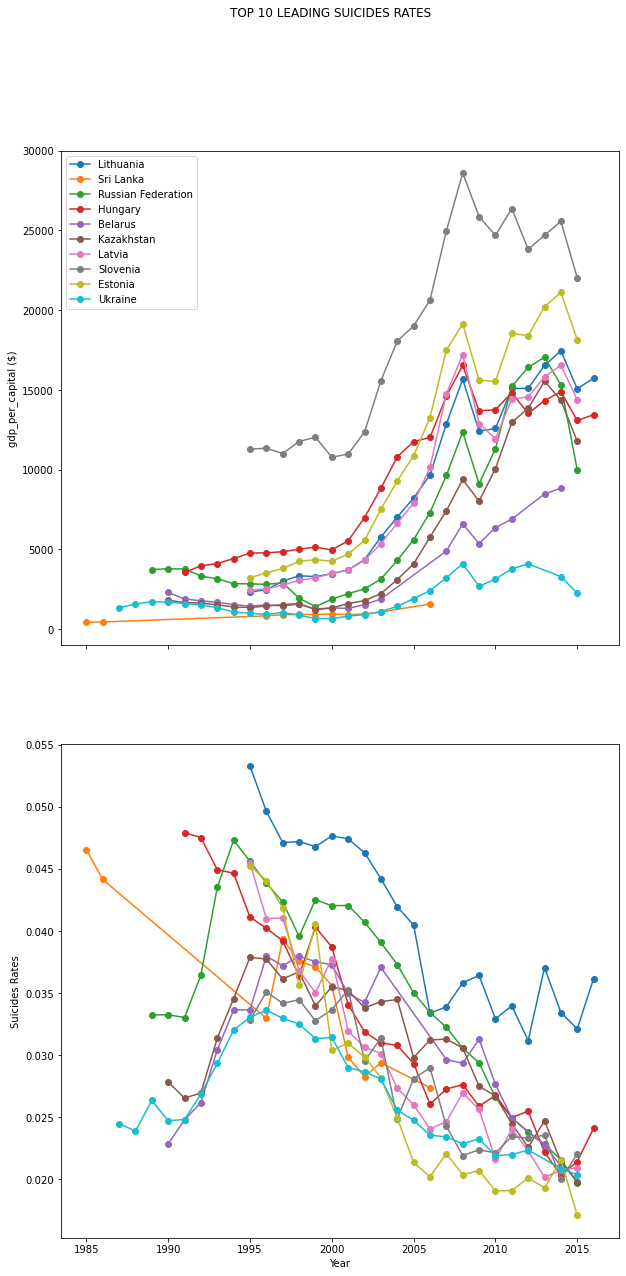

In [16]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize = (10, 20))
ax1.set(ylabel='gdp_per_capital ($)')
ax2.set(xlabel='Year', ylabel='Suicides Rates')
fig.suptitle('TOP 10 LEADING SUICIDES RATES')

# plot of gdp
for country in top_10_suicides_countries:
    ax1.plot(df_gdp[country].index,
                 df_gdp[country].values,
                 label=country,
                 marker="o")
ax1.legend()

# plot of suicides
for country in top_10_suicides_countries:
    ax2.plot(df_suicides[country].index,
             df_suicides[country].values,
             label=country,
             marker="o")

***Dựa vào biểu đồ ta vừa trực quan, ta dễ dàng thấy rằng từ năm `1985` đến năm `2015`, tỉ lệ tự tử có xu hướng giảm còn GDP có xu hướng tăng ở top 10 nước có tỉ lệ tự tử cao nhất.***

Ở một vài thời điểm kinh tế tụt dốc (điển hình vào thời điểm `2008 - 2010`), tỉ lệ tử vong của một vài nước có xu hướng tăng nhẹ (điển hình như `Estonia`, `Belarus`, `Lithuania`)

#### 10 nước top đầu về GDP

In [17]:
top_10_gdp_countries = list(top_10_gdp_mean_df.index.unique())
top_10_gdp_df = insight_df.loc[insight_df['country'].isin(top_10_gdp_countries)]
top_10_gdp_df

,country,year,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),suicides_rates
7418,Denmark,1994,89,131700,67.58,"156,162,311,732",32034,0.067578
7419,Denmark,1994,189,448200,42.17,"156,162,311,732",32034,0.042169
7420,Denmark,1994,279,755600,36.92,"156,162,311,732",32034,0.036924
7421,Denmark,1994,70,230600,30.36,"156,162,311,732",32034,0.030356
7422,Denmark,1994,85,414100,20.53,"156,162,311,732",32034,0.020526
...,...,...,...,...,...,...,...,...
27215,United States,2015,1444,21555712,6.70,"18,120,714,000,000",60387,0.006699
27216,United States,2015,1132,21633813,5.23,"18,120,714,000,000",60387,0.005233
27217,United States,2015,540,11778666,4.58,"18,120,714,000,000",60387,0.004585
27218,United States,2015,255,21273987,1.20,"18,120,714,000,000",60387,0.001199


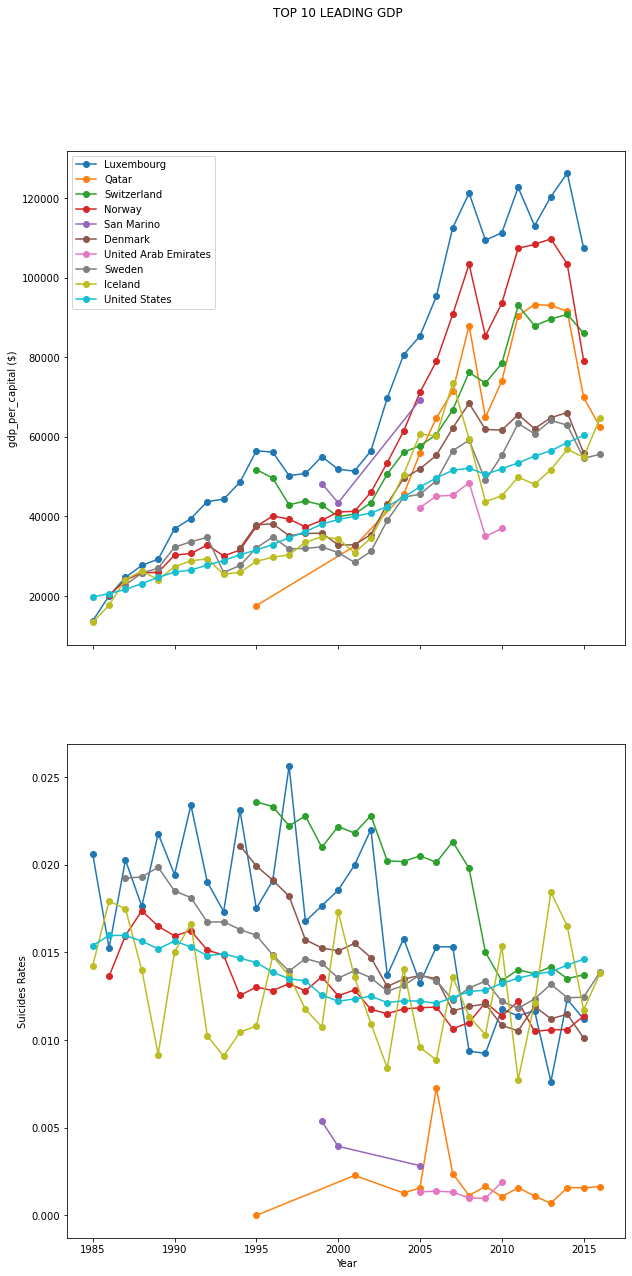

In [18]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize = (10, 20))
ax1.set(ylabel='gdp_per_capital ($)')
ax2.set(xlabel='Year', ylabel='Suicides Rates')
fig.suptitle('TOP 10 LEADING GDP')

# plot of gdp
for country in top_10_gdp_countries:
    ax1.plot(df_gdp[country].index,
                 df_gdp[country].values,
                 label=country,
                 marker="o")
ax1.legend()

# plot of suicides
for country in top_10_gdp_countries:
    ax2.plot(df_suicides[country].index,
             df_suicides[country].values,
             label=country,
             marker="o")

**Nhận xét**: Ở top 10 nước có GDP cao nhất thì lại khó nhận thấy sự đối lập hơn, khi tỉ lệ tử vong ở các nước này không có sự ổn định hay có xu hướng tăng/giảm rõ rệt mà lại tăng giảm gãy khúc trong một vùng (Có thể bởi vì ban lãnh đạo tập trung vào các chính sách kinh tế mà bỏ quên các chính sách cân bằng dân số và cải thiện chất lượng đời sống/ xã hội???). Tuy nhiên kinh tế vẫn có xu hướng tăng rõ rệt

#### Về Nhật Bản

Nhắc đến tỉ lệ tự tử, ta không thể không nhắc đến `Nhật Bản - Đất nước hoa anh đào` được.

Nhật Bản không chỉ nổi tiếng về sự phát triển vượt bậc của kinh tế mà còn về áp lực công việc và tỉ lệ tử vong của người lao động.

Nhật Bản xưa từng là một nước nghèo nàn, kém phát triển về kinh tế. Không những thế, nền kinh tế Nhật Bản còn chịu ảnh hưởng bởi rất nhiều yếu tố bên ngoài (2 quả bom của Mỹ, thiên tai,...). Mặc dù chịu nhiều ảnh hưởng nhưng nền kinh tế Nhật Bản lại phát triển một cách vượt bậc, vượt xa so với các nước láng giềng trong khu vực.

Ta hãy cùng đi tìm hiểu và phân tích về vấn đề này

In [19]:
japan_df = insight_df.loc[insight_df['country'] == 'Japan']
japan_df

,country,year,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),suicides_rates
13364,Japan,1985,1340,1791000,74.82,"1,398,892,744,821",12401,0.074819
13365,Japan,1985,1553,2862400,54.26,"1,398,892,744,821",12401,0.054255
13366,Japan,1985,3763,8996900,41.83,"1,398,892,744,821",12401,0.041826
13367,Japan,1985,6962,17833300,39.04,"1,398,892,744,821",12401,0.039039
13368,Japan,1985,1982,8465800,23.41,"1,398,892,744,821",12401,0.023412
...,...,...,...,...,...,...,...,...
13731,Japan,2015,2024,16991218,11.91,"4,394,977,752,878",36510,0.011912
13732,Japan,2015,685,6614211,10.36,"4,394,977,752,878",36510,0.010356
13733,Japan,2015,408,5772938,7.07,"4,394,977,752,878",36510,0.007067
13734,Japan,2015,62,5553851,1.12,"4,394,977,752,878",36510,0.001116


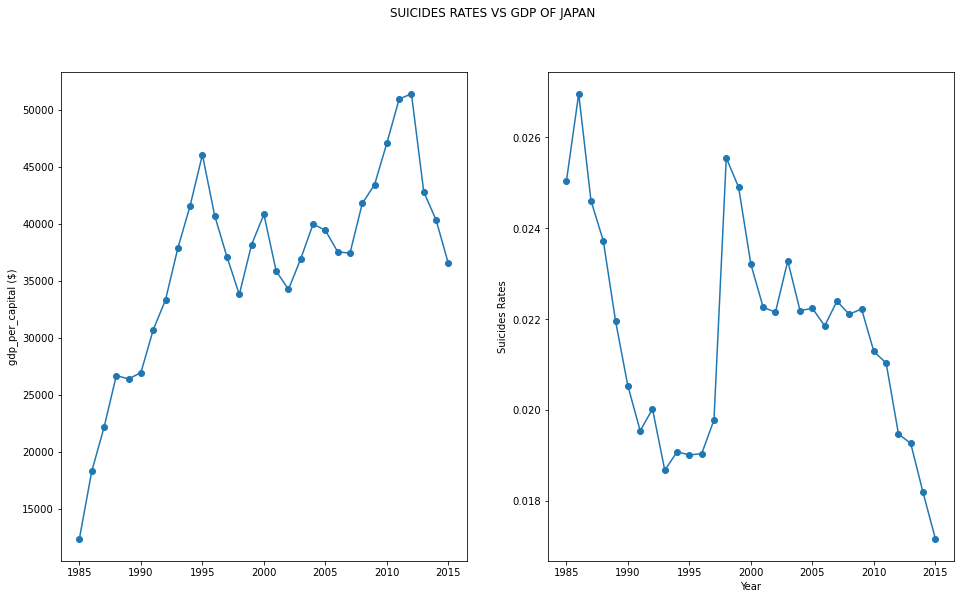

In [20]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 9))
ax1.set(ylabel='gdp_per_capital ($)')
ax2.set(xlabel='Year', ylabel='Suicides Rates')
fig.suptitle('SUICIDES RATES VS GDP OF JAPAN')

# plot of gdp
ax1.plot(df_gdp['Japan'].index,
         df_gdp['Japan'].values,
         marker="o")

# plot of suicides
ax2.plot(df_suicides['Japan'].index,
         df_suicides['Japan'].values,
         marker="o")

**Nhận xét: Dựa vào 2 biểu đồ trên ta có thể thấy xu hướng phát triển kinh tế và tỉ lệ tự tử ở Nhật Bản có sự đối lập nhau rõ rệt.**

Ở các mốc thời gian `1987 - 1990` và `1995-1997`, GDP có xu hướng tăng thì tỉ lệ tự tử giảm, GDP có xu hướng giảm thì tỉ lệ tự tử tăng.

Dự đoán: Có thể việc này xuất phát từ việc nền kinh tế nước này giảm nhưng bộ phận lãnh đạo không có các chính sách hỗ trợ người dân kịp thời dẫn đến việc người lao động phổ thông không đủ sống, dẫn đến việc tỉ lệ tự tử tăng???

# Nhận xét

Giống như nhận định mà ta đã đưa ra trước khi tìm hiểu và trả lời câu hỏi

```
Việc tự tử ở người dân sẽ chịu ảnh hưởng và gây ảnh hưởng đến nền kinh tế của một nước. Xu hướng của việc tự tử và sự phát triển của nền kinh tế sẽ có sự đối nghịch nhau và có mối quan hệ nhân-quả
```
Điều này đã được ta thể hiện ở `top 10 quốc gia có số người tự tử trung bình cao nhất`, `top 10 quốc gia có GDP trung bình cao nhất` và `Nhật Bản` trong tập dữ liệu mà ta thu thập được.

Có thể việc này bắt nguồn từ việc các chính sách thúc đẩy gia tăng kinh tế của các nước nhưng các chính sách cân bằng dân số và nhập/xuất cư lại không hợp lý khiến cho việc người lao động chịu áp lực công việc ngày một tăng dẫn đến tỉ lệ tự tử tăng.

Tuy việc này hầu hết đã được tính toán và cân bằng ở các chính sách điều chỉnh dân số nhưng có thể sự tăng/giảm đột ngột ở tỉ lệ tự tử này sẽ là một điều mà các nhà lãnh đạo cần để ý khi thực hiện các chính sách về kinh tế và lao động